In [1]:
import pandas as pd
file = "Fraud.csv"
df2 = pd.read_csv(file)
df2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Data Cleaning & Exploration

The Following dataset consists of 10 columns out of which 8 could be considerd as independent variables. Columns step, nameOrig and nameDest seems to have no direct impact on the outcome in first glance. To verify this claim we can perform plot correlation matrix.

In [2]:
df2 = df2.drop(columns=["step","nameOrig","nameDest"],axis=1)
df2 = pd.get_dummies(df2,columns=["type"])
df2

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,1,0,0,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0,0,1,0,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,0,0,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,0,0,1


C:\Users\kaush\AppData\Local\Temp\ipykernel_3180\509463988.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm = df.corr()


<AxesSubplot: >

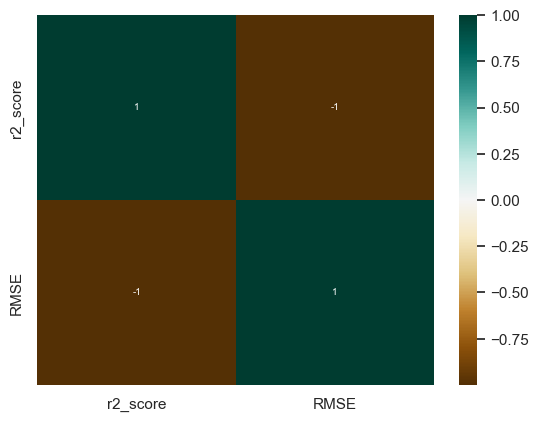

In [68]:
import seaborn as sns
hm = df2.corr()
sns.set(font_scale=1)
sns.heatmap(hm,cmap="BrBG",annot=True,annot_kws={'size':'7'})

In [ ]:
import seaborn as sns
sns.set_context("talk")
sns.pairplot(df2/2)

Even from the above heatmap it's clearly visible that variables such as amount and newbalanceDest, old/new balanceDest and type have postive correlation which might hinder with our results. We can eliminate this multi colinearity using PCA. Also variable amount has influence on the isFraud target variable suggesting if on an average a transaction is bank transfer then it has fair chances to be a fraudulent.

# Performing PCA

In [35]:
X = df2.values
X.shape

(6362620, 12)

In [36]:
#Step 1 Standardizing the dataset
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X)
x_std = std.transform(X)

In [37]:
#Step 2 Choosing right number of principal components k
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_std)
x_pca = pca.transform(x_std)

In [50]:
from importlib import reload
import matplotlib.pyplot as plt
plt = reload(plt)

Text(0, 0.5, 'Explained Variance')

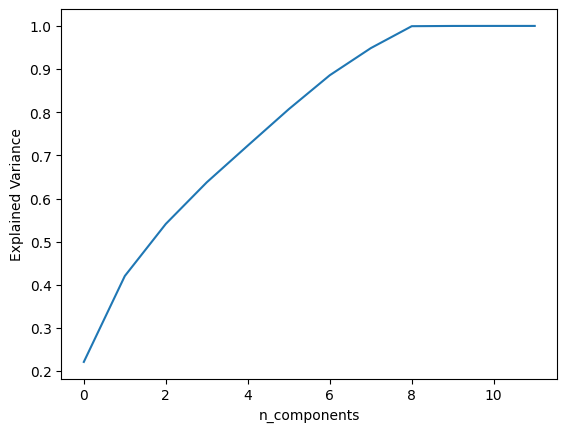

In [53]:
#Plotting the explained variance ratios
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))
x_label = "n_components"         
plt.xlabel(x_label)
plt.ylabel("Explained Variance")

Since the highest amount of variance is explained by 8 principal components we would be reducing the dimension from 12 to 8.

In [54]:
pca = PCA(n_components=8,random_state=420)
x_pca = pca.fit_transform(x_std)

In [75]:
x_pca.shape

(6362620, 8)

In [74]:
fr = pd.DataFrame(pca.components_,columns=df2.columns,index = [x for x in range(8)])
fr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.197397,0.483129,0.486739,0.330400,0.329366,0.010425,0.004060,0.409068,-0.095147,-0.010059,-0.302229,0.071423
1,0.352354,-0.323977,-0.328391,0.439054,0.483257,0.036529,0.003215,-0.261981,0.256752,0.009475,-0.183178,0.259219
2,0.234231,-0.034359,-0.033854,0.057297,0.096191,0.039137,0.014529,-0.011012,-0.720867,0.003184,0.514249,0.379867
3,0.290651,0.023167,0.012861,-0.390770,-0.315796,0.450350,0.171999,0.016665,0.059476,-0.064459,-0.374498,0.530824
4,-0.081147,0.034926,0.026971,0.143643,0.115784,0.434171,0.784289,-0.056224,0.035670,-0.164723,0.206462,-0.282173
5,-0.056846,-0.024985,-0.024761,0.010726,-0.001752,0.071334,0.181175,0.017133,-0.078093,0.970840,-0.090932,-0.017603
6,0.045597,-0.048612,-0.033113,-0.091727,-0.074148,-0.761868,0.567597,0.066598,-0.023408,-0.061732,-0.150467,0.215653
7,0.149130,0.401640,0.378055,-0.063969,-0.007945,-0.117976,-0.001150,-0.702592,0.262201,0.098351,0.259017,0.127661


In [77]:
pca_components = abs(pca.components_)
import numpy as np

In [83]:
print('Top most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 1)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:1]
    
    # print the top 4 feature names
    print(f'Component {row}: {df2.columns[indices].to_list()}')

Top most important features in each component
Component 0: ['newbalanceOrig']
Component 1: ['newbalanceDest']
Component 2: ['type_CASH_OUT']
Component 3: ['type_TRANSFER']
Component 4: ['isFlaggedFraud']
Component 5: ['type_DEBIT']
Component 6: ['isFraud']
Component 7: ['type_CASH_IN']


In [84]:
df_train = pd.DataFrame(x_pca, columns=['newbalanceOrig','newbalanceDest','type_CASH_OUT','type_TRANSFER','isFlaggedFraud','type_DEBIT','isFraud','type_CASH_IN'])

In [90]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
df_train_norm = MM.fit_transform(df_train)
df_norm = pd.DataFrame(df_train_norm,columns=df_train.columns)
df_norm.describe()

,newbalanceOrig,newbalanceDest,type_CASH_OUT,type_TRANSFER,isFlaggedFraud,type_DEBIT,isFraud,type_CASH_IN
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.544422e-02,8.836317e-02,5.513492e-02,3.570192e-01,2.066164e-02,6.998669e-02,8.713753e-02,2.914724e-01
std,2.190999e-02,1.312998e-02,2.872164e-02,5.397582e-03,1.957030e-03,8.052376e-03,2.623003e-03,2.698384e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.934756e-04,8.314222e-02,2.166188e-02,3.539744e-01,2.047223e-02,6.896429e-02,8.660485e-02,2.980663e-01
50%,8.148764e-03,8.339192e-02,5.537649e-02,3.574161e-01,2.065071e-02,6.907996e-02,8.720026e-02,2.995131e-01
75%,2.275027e-02,9.368801e-02,7.999479e-02,3.585675e-01,2.123120e-02,6.956166e-02,8.736990e-02,3.005107e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# Training Models on this reduced dataset

In [10]:
df = pd.DataFrame(columns = ['r2_score', 'RMSE']) #run this cell

In [92]:
from sklearn.model_selection import train_test_split
y = df_norm[['isFraud','isFlaggedFraud']]
X = df_norm[[x for x in df_norm.columns if (x!='isFraud' and x!='isFlaggedFraud')]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [93]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [94]:
from sklearn.metrics import r2_score, mean_squared_error
r2_lr = r2_score(y_test,y_preds)
rmse_lr = mean_squared_error(y_test,y_preds)

In [96]:
r2_lr, rmse_lr


(-0.0033529369926610375, 5.90950333414611e-06)

In [98]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(X_train,y_train)
y_preds = KNN.predict(X_test)
r2KNN_cv = r2_score(y_test,y_preds)
maeKNN_cv = mean_absolute_error(y_test,y_preds)
r2KNN_cv,maeKNN_cv

(0.9999694460442059, 1.1600211818478279e-06)

In [97]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)
y_preds = DT.predict(X_test)
r2_DT = r2_score(y_test,y_preds)
rmse_DT = mean_squared_error(y_test,y_preds)
r2_DT, rmse_DT


(0.9999708108609837, 1.610130198858012e-10)

In [19]:
names = ['Linear Regressor', "Decision Tree"]
df["Models"] = names
df

,r2_score,RMSE,Models
0,0.094913,0.000524,Linear Regressor
1,0.696215,0.000150,Decision Tree


# Performing Cross Validation

In [27]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for tri,tei in kf.split(X):
    X_train, X_test = X.iloc[tri,:] , X.iloc[tei,:]
    y_train, y_test = y.iloc[tri] , y.iloc[tei]

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
5090091,20415.41,836172.88,856588.29,341900.82,321485.41,1,0,0,0,0
5090092,181218.95,82063.00,0.00,448148.69,629367.64,0,1,0,0,0
5090093,442.41,0.00,0.00,0.00,0.00,0,0,0,1,0
5090094,327991.99,51764.00,379755.99,2640055.84,2312063.85,1,0,0,0,0


In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
DT.fit(X_train,y_train)
dt_cv = DT.predict(X_test)
r2DT_cv = r2_score(y_test,dt_cv)
maeDT_cv = mean_absolute_error(y_test,dt_cv)
df.loc[len(df)] = [r2DT_cv, maeDT_cv, "Decision Tree with KFold"]
df

,r2_score,RMSE,Models
0,0.094913,0.000524,Linear Regressor
1,0.696215,0.000150,Decision Tree
2,0.490240,0.000293,Decision Tree with KFold
